#                                         AMAZON SALES ANALYTICS

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [89]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Amazon Sale Report Using Python-Copy1.ipynb',
 'Amazon Sale Report Using Python.ipynb',
 'Amazon Sale Report.csv',
 'Data Analyst_78G0OL.pdf',
 'RISHAB B (1).pdf',
 'sample.pdf']

In [90]:
df = pd.read_csv('Amazon Sale Report.csv')

In [91]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


# Removing columns with None values

In [92]:
df['New'].unique()

array([nan])

In [93]:
df['PendingS'].unique()

array([nan])

In [94]:
df.drop('PendingS',axis=1,inplace=True)
df.drop('New',axis=1,inplace=True)

# 1) INDEX

## During the initial glance at the data I found the index column has repeated values 

For example consider index 6 to 13 it repeats at 201 to 208

In [95]:
df.loc[6:13]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False,NaN
10,10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
11,11,171-4638481-6326716,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,1,INR,364.0,NOIDA,UTTAR PRADESH,201303.0,IN,False,NaN
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.0,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship
13,13,408-7955685-3083534,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,657.0,MUMBAI,MAHARASHTRA,400053.0,IN,False,NaN


In [96]:
df.loc[201:208]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
201,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
202,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
203,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
204,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False,NaN
205,10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
206,11,171-4638481-6326716,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,1,INR,364.0,NOIDA,UTTAR PRADESH,201303.0,IN,False,NaN
207,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.0,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship
208,13,408-7955685-3083534,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,657.0,MUMBAI,MAHARASHTRA,400053.0,IN,False,NaN


# Now to find how many rows are repeated or have duplicates 

In [97]:
df[df.duplicated()==True]

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
201,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN
202,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
203,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN
204,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,False,NaN
205,10,407-5633625-6970741,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,685.0,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,6278,171-5170733-7855514,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,582.0,HYDERABAD,TELANGANA,500083.0,IN,False,Easy Ship
6641,6279,403-8137343-5206760,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1,INR,801.0,KALPETTA,KERALA,673122.0,IN,False,Easy Ship
6642,6280,408-1575454-3263526,04-26-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Blazzer,M,Shipped,1,INR,690.0,CHENNAI,TAMIL NADU,600049.0,IN,False,Easy Ship
6643,6281,171-2918708-7197155,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Blazzer,XXL,Shipped,1,INR,658.0,PUNE,MAHARASHTRA,412207.0,IN,False,Easy Ship


In [98]:
df[df['index']==7].values

array([[7, '406-7807733-3785945', '04-30-22',
        'Shipped - Delivered to Buyer', 'Merchant', 'Amazon.in',
        'Standard', 'Shirt', 'S', 'Shipped', 1, 'INR', 399.0,
        'HYDERABAD', 'TELANGANA', 500032.0, 'IN', False, 'Easy Ship'],
       [7, '406-7807733-3785945', '04-30-22',
        'Shipped - Delivered to Buyer', 'Merchant', 'Amazon.in',
        'Standard', 'Shirt', 'S', 'Shipped', 1, 'INR', 399.0,
        'HYDERABAD', 'TELANGANA', 500032.0, 'IN', False, 'Easy Ship']],
      dtype=object)

In [99]:
df.shape

(128976, 19)

## No of duplicate rows

In [100]:
len(df['index'])-len(set(df['index']))

168

In [101]:
df = df.drop_duplicates(subset=['index'],keep='first')

In [102]:
df.shape

(128808, 19)

In [103]:
128976-128808

168

## Now to Reset the index so that there are no missing values in between

In [104]:
# Reset the index
df.reset_index(inplace=True)

In [105]:
#Dropping the old index columns
df.drop(['level_0','index'],axis=1,inplace=True)

In [106]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128803,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128804,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128805,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128806,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


# 2) ORDER ID

## To find and remove duplicate Order ID as index values where different we where unable to remove them in previous step

In [107]:
df[df.duplicated()==True]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
167,407-3742007-3242711,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500086.0,IN,False,NaN
300,408-3870331-6287517,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,1,INR,399.0,Dehradun,UTTARAKHAND,248001.0,IN,False,NaN
359,403-7042175-3905937,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,499.0,BARRACKPORE,WEST BENGAL,700122.0,IN,False,NaN
466,405-9000587-4386763,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,399.0,PUNE,MAHARASHTRA,411057.0,IN,False,NaN
891,403-1140011-7398736,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,549.0,PATNA,BIHAR,800003.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128190,402-3963904-1085913,06-01-2022,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,0,NaN,NaN,SECUNDERABAD,TELANGANA,500025.0,IN,False,NaN
128205,407-3748395-2933152,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,1,INR,399.0,BENGALURU,KARNATAKA,560037.0,IN,False,NaN
128328,406-7346635-7865146,06-01-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,292.0,BENGALURU,KARNATAKA,560078.0,IN,False,NaN
128741,403-6757403-6097100,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN


In [108]:
df[df['Order ID']=='402-3963904-1085913'].values

array([['402-3963904-1085913', '06-01-2022', 'Cancelled', 'Amazon',
        'Amazon.in', 'Expedited', 'T-shirt', 'L', 'Cancelled', 0, nan,
        nan, 'SECUNDERABAD', 'TELANGANA', 500025.0, 'IN', False, nan],
       ['402-3963904-1085913', '06-01-2022', 'Cancelled', 'Amazon',
        'Amazon.in', 'Expedited', 'T-shirt', 'L', 'Cancelled', 0, nan,
        nan, 'SECUNDERABAD', 'TELANGANA', 500025.0, 'IN', False, nan],
       ['402-3963904-1085913', '06-01-2022', 'Cancelled', 'Amazon',
        'Amazon.in', 'Expedited', 'T-shirt', 'L', 'Cancelled', 0, nan,
        nan, 'SECUNDERABAD', 'TELANGANA', 500025.0, 'IN', False, nan],
       ['402-3963904-1085913', '06-01-2022', 'Cancelled', 'Amazon',
        'Amazon.in', 'Expedited', 'Shirt', 'L', 'Cancelled', 0, nan, nan,
        'SECUNDERABAD', 'TELANGANA', 500025.0, 'IN', False, nan]],
      dtype=object)

In [109]:
df[df['Order ID']=='407-3748395-2933152'].values

array([['407-3748395-2933152', '06-01-2022', 'Shipped', 'Amazon',
        'Amazon.in', 'Expedited', 'Shirt', '3XL', 'Shipped', 1, 'INR',
        399.0, 'BENGALURU', 'KARNATAKA', 560037.0, 'IN', False, nan],
       ['407-3748395-2933152', '06-01-2022', 'Shipped', 'Amazon',
        'Amazon.in', 'Expedited', 'Shirt', '3XL', 'Shipped', 1, 'INR',
        399.0, 'BENGALURU', 'KARNATAKA', 560037.0, 'IN', False, nan]],
      dtype=object)

In [110]:
len(df['Order ID'].unique())

120229

In [111]:
df.drop_duplicates(subset=['Order ID'],keep='first',inplace=True)
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128803,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128804,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128805,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128806,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [112]:
df.reset_index(inplace=True)
df.drop(['index'],axis = 1,inplace=True)

# 3) DATE

In [113]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 120229 entries, 0 to 120228
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
120229 non-null  object
dtypes: object(1)
memory usage: 939.4+ KB


In [114]:
df['Date'] = df['Date'].apply(lambda x: x[:6]+'2022' if x[6:]=='22' else x)

### Spliting the Date column into Date, Month and Year columns 

In [115]:
df[['Month','Day','Year']] = df['Date'].str.split('-',expand=True)

In [116]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

df['Month'] = df['Month'].apply(lambda x: months[int(x)])

In [117]:
df['Month'].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

In [118]:
df['Year'].unique()

array(['2022'], dtype=object)

In [119]:
df["Day"]

0         30
1         30
2         30
3         30
4         30
          ..
120224    31
120225    31
120226    31
120227    31
120228    31
Name: Day, Length: 120229, dtype: object

In [120]:
def convert_date_to_day(date):
    date = datetime.datetime.strptime(date, '%m-%d-%Y')
    return date.strftime('%A')

In [121]:
df['Day_of_Week'] = df['Date'].apply(convert_date_to_day)

In [122]:
df['Day_of_Week']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
120224     Tuesday
120225     Tuesday
120226     Tuesday
120227     Tuesday
120228     Tuesday
Name: Day_of_Week, Length: 120229, dtype: object

In [123]:
def plot_bar(x,y):
    data = df.groupby([x])['Amount'].sum()
    plt.figure(figsize =(10, 7))
    plt.bar(data.keys(),data.values,color = "#4CAF50")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(x+' vs '+y)
    plt.show()

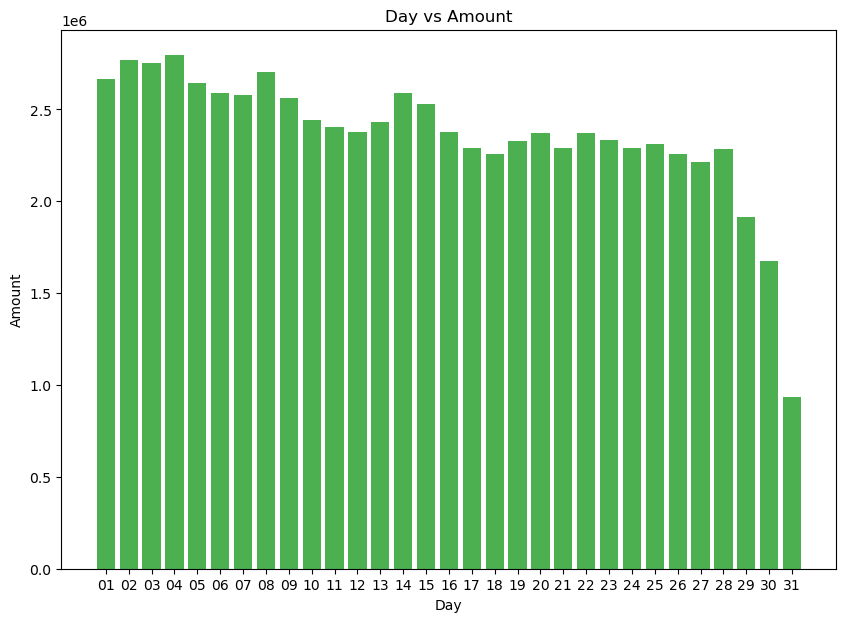

In [124]:
plot_bar('Day','Amount')

In [125]:
df.groupby(['Day'])['Amount'].sum().values

array([2664533.92, 2769684.09, 2754859.6 , 2794253.74, 2643177.15,
       2589125.22, 2581336.78, 2701835.41, 2559965.86, 2443394.76,
       2405607.7 , 2375388.16, 2430643.52, 2589669.3 , 2528621.64,
       2375148.61, 2288490.2 , 2255561.92, 2326155.93, 2371088.07,
       2292342.21, 2369328.05, 2334599.98, 2288704.7 , 2309341.7 ,
       2258040.79, 2213506.92, 2282582.37, 1917085.23, 1673501.4 ,
        935893.94])

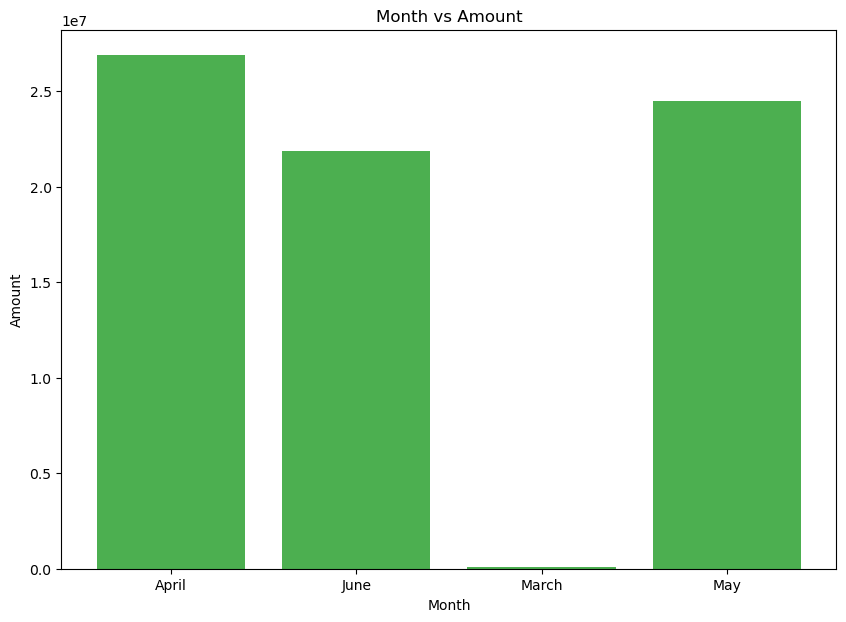

In [126]:
plot_bar('Month','Amount')

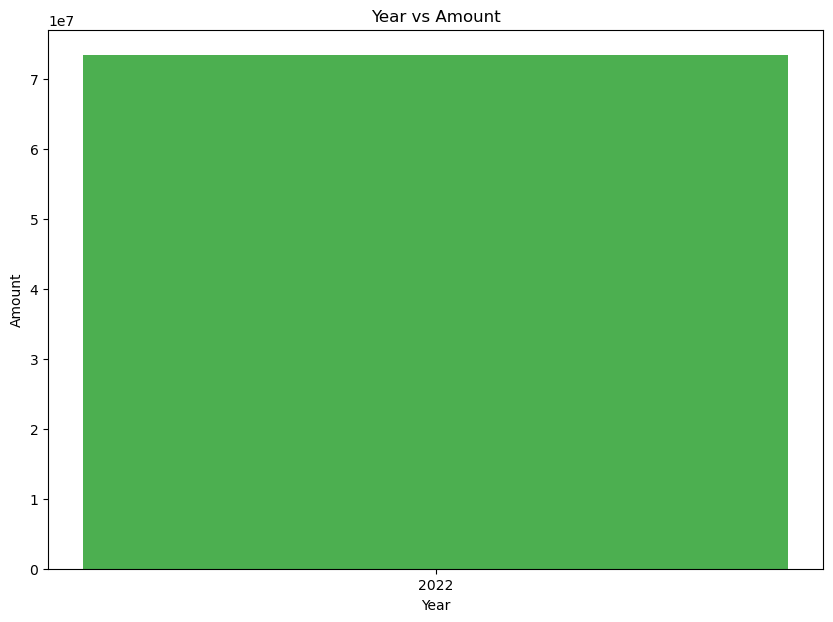

In [127]:
plot_bar('Year','Amount')

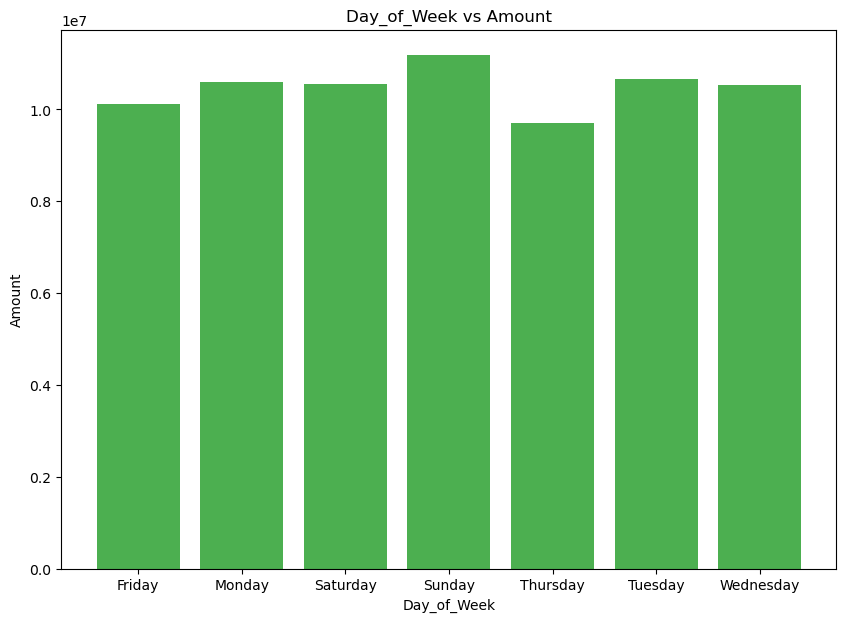

In [128]:
plot_bar('Day_of_Week','Amount')

# 4)STATUS

In [129]:
df.Status.unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [130]:
def pie_chart(l):
    x = []
    arr = df[l].unique()
    for i in arr:
        x.append(df[df[l]==i]['Order ID'].count())
    plt.figure(figsize=(7,7))
    plt.pie(x,labels=arr,autopct='%1.2f%%')
    plt.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left')
    plt.show()


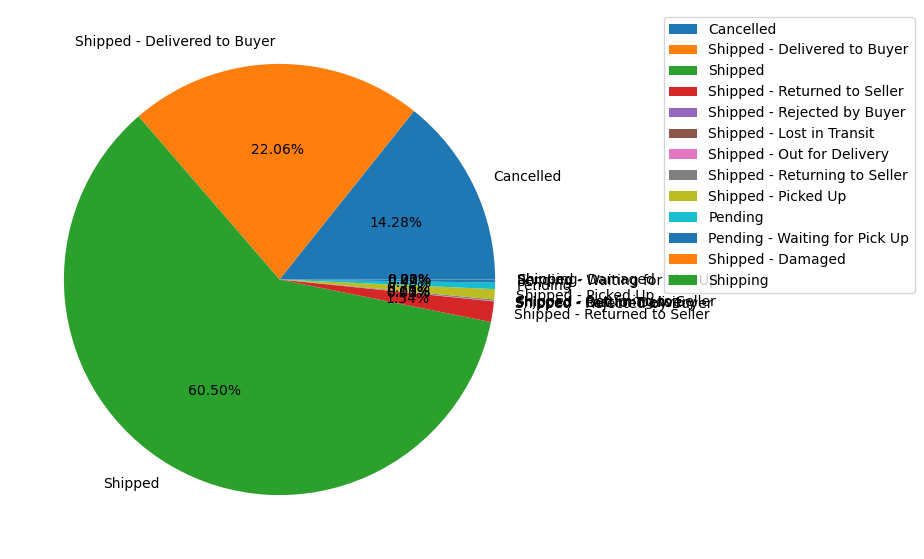

In [131]:
pie_chart('Status')

# 5) FULFILMENT

In [132]:
df.Fulfilment.unique()

array(['Merchant', 'Amazon'], dtype=object)

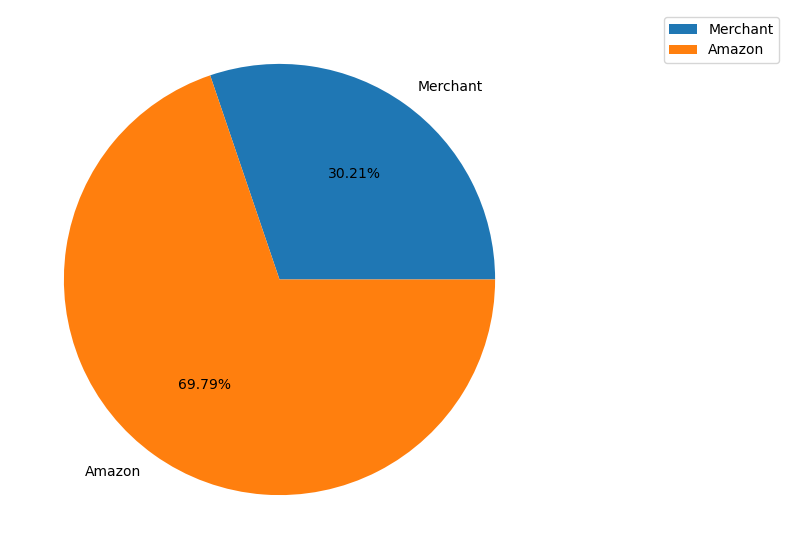

In [133]:
pie_chart('Fulfilment')

# 6) SALES CHANNEL

In [134]:
df['Sales Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

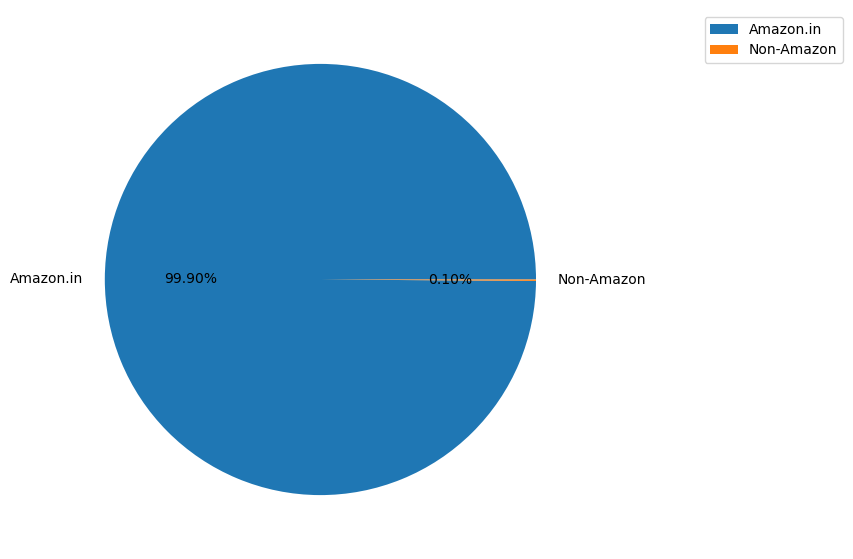

In [135]:
pie_chart('Sales Channel')

# 7) SHIP-SERVICE-LEVEL

In [136]:
df['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

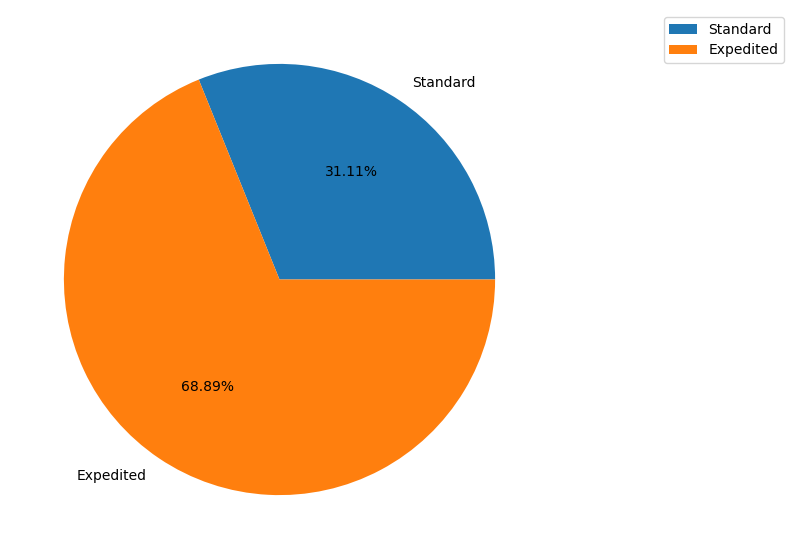

In [137]:
pie_chart('ship-service-level')

# 8) CATEGORY

In [138]:
df['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

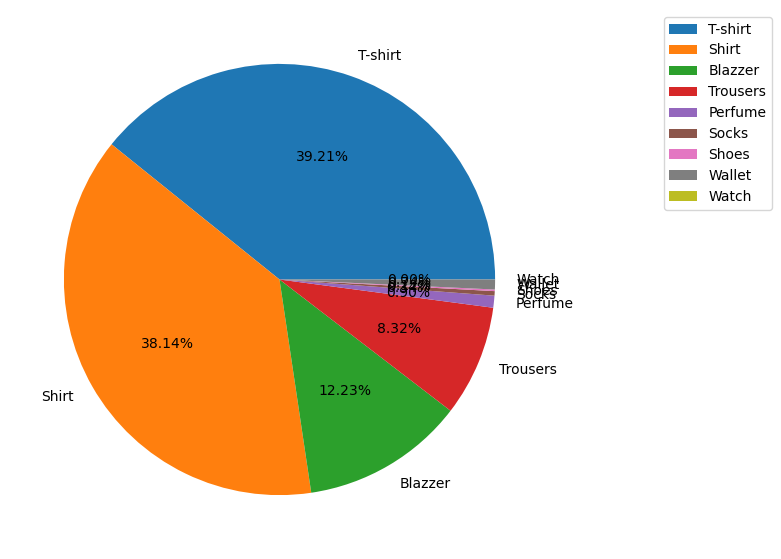

In [139]:
pie_chart('Category')

# 9) SIZE

In [140]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

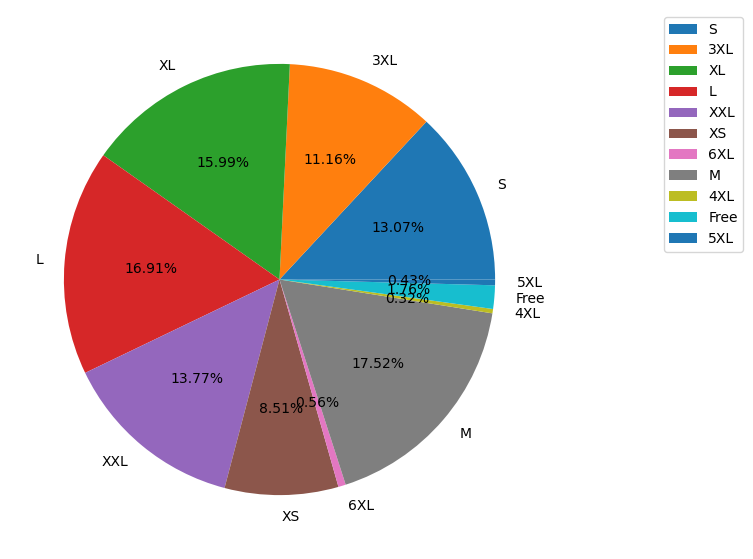

In [141]:
pie_chart('Size')

# 10) COURIER STATUS

In [142]:
df['Courier Status'].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

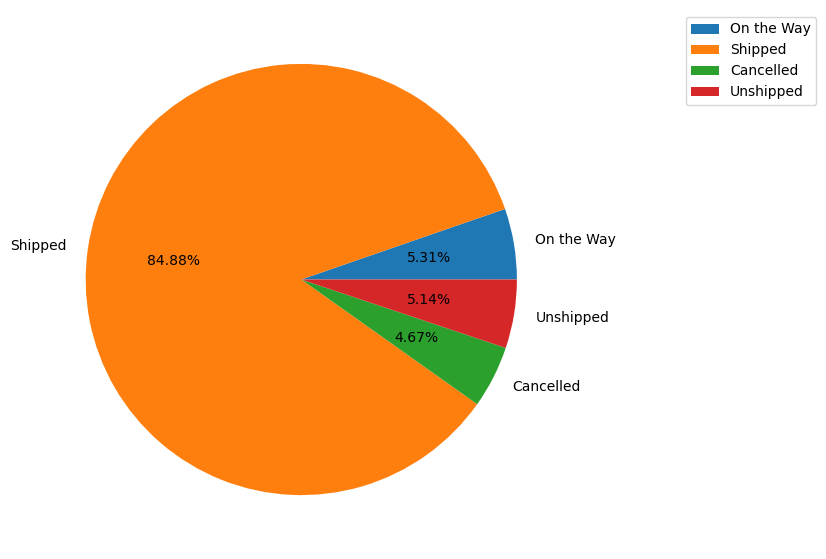

In [143]:
pie_chart('Courier Status')

## CURRENCY

In [144]:
df['currency'].unique()

array(['INR', nan], dtype=object)

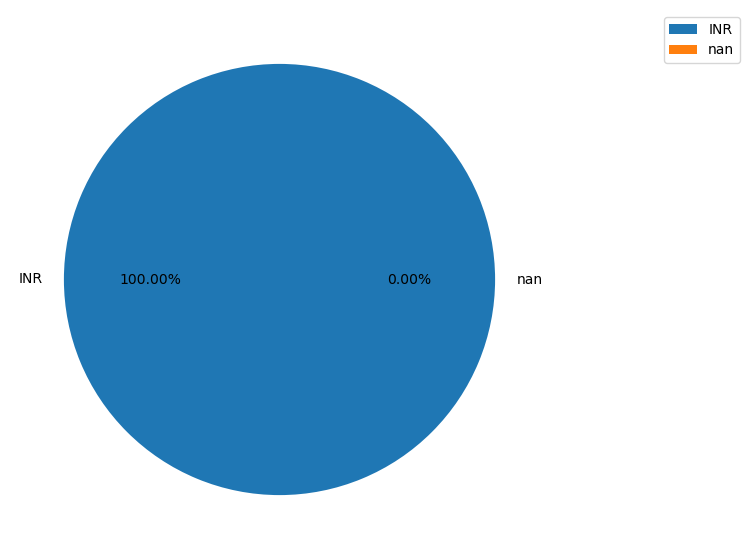

In [145]:
pie_chart('currency')

# Overall Sales Performance

In [146]:
df['Amount'].describe()

count    112834.000000
mean        649.834880
std         281.452066
min           0.000000
25%         449.000000
50%         612.000000
75%         788.000000
max        5495.000000
Name: Amount, dtype: float64

In [147]:
# Calculate total sales, number of orders, and average order value
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
average_order_value = total_sales / total_orders

print(f"Total Sales: ${total_sales}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${average_order_value:.2f}")


Total Sales: $73323468.87
Total Orders: 120229
Average Order Value: $609.87


# Sales Trends Over Time

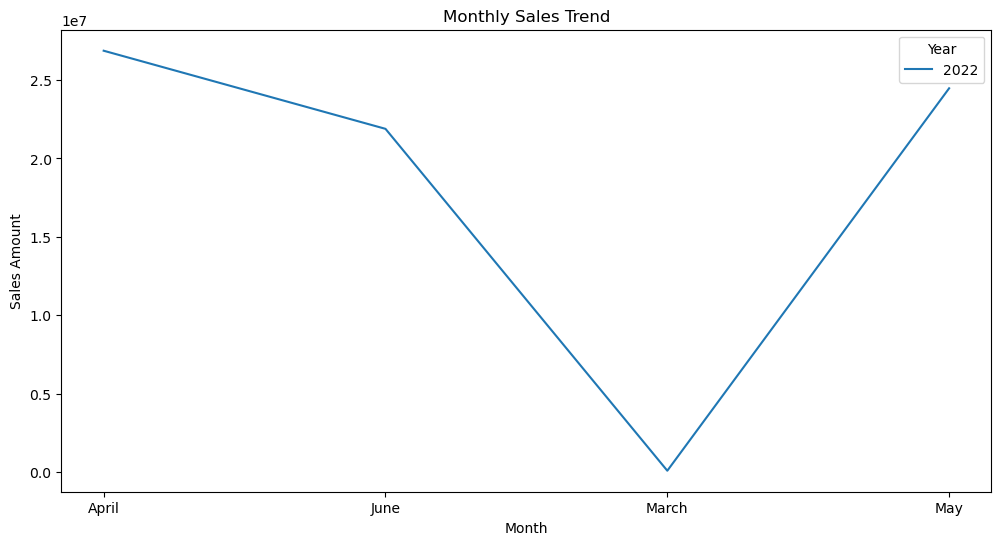

In [152]:
# Group sales by month/year
sales_trend = df.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Plot the sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Month', y='Amount', hue='Year')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales Amount')
plt.xlabel('Month')
plt.show()

# Distribution of Product Categories

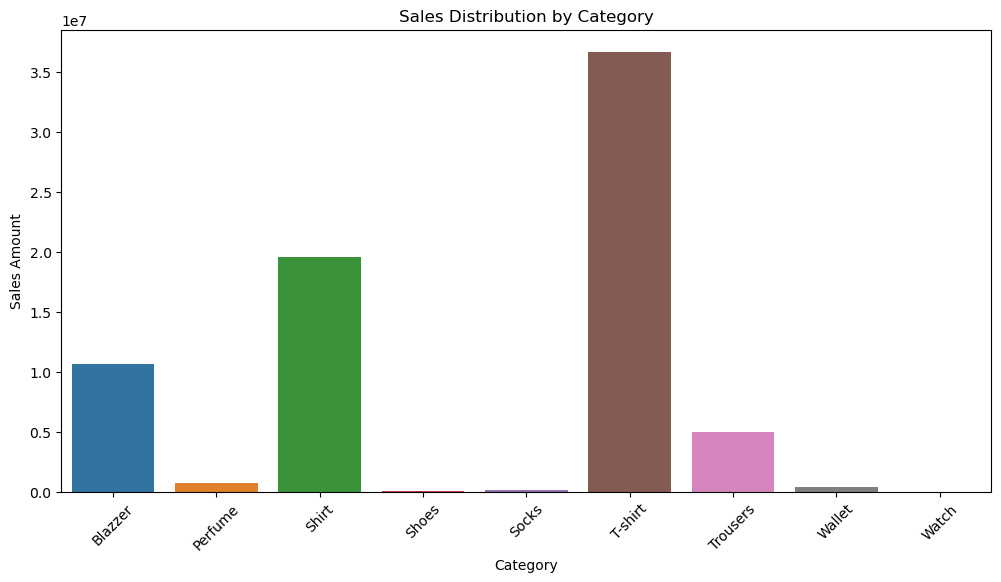

In [153]:
# Analyze sales by product category
category_sales = df.groupby('Category')['Amount'].sum().reset_index()

# Plot the sales distribution by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Category', y='Amount')
plt.title('Sales Distribution by Category')
plt.ylabel('Sales Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


# Geographical Analysis

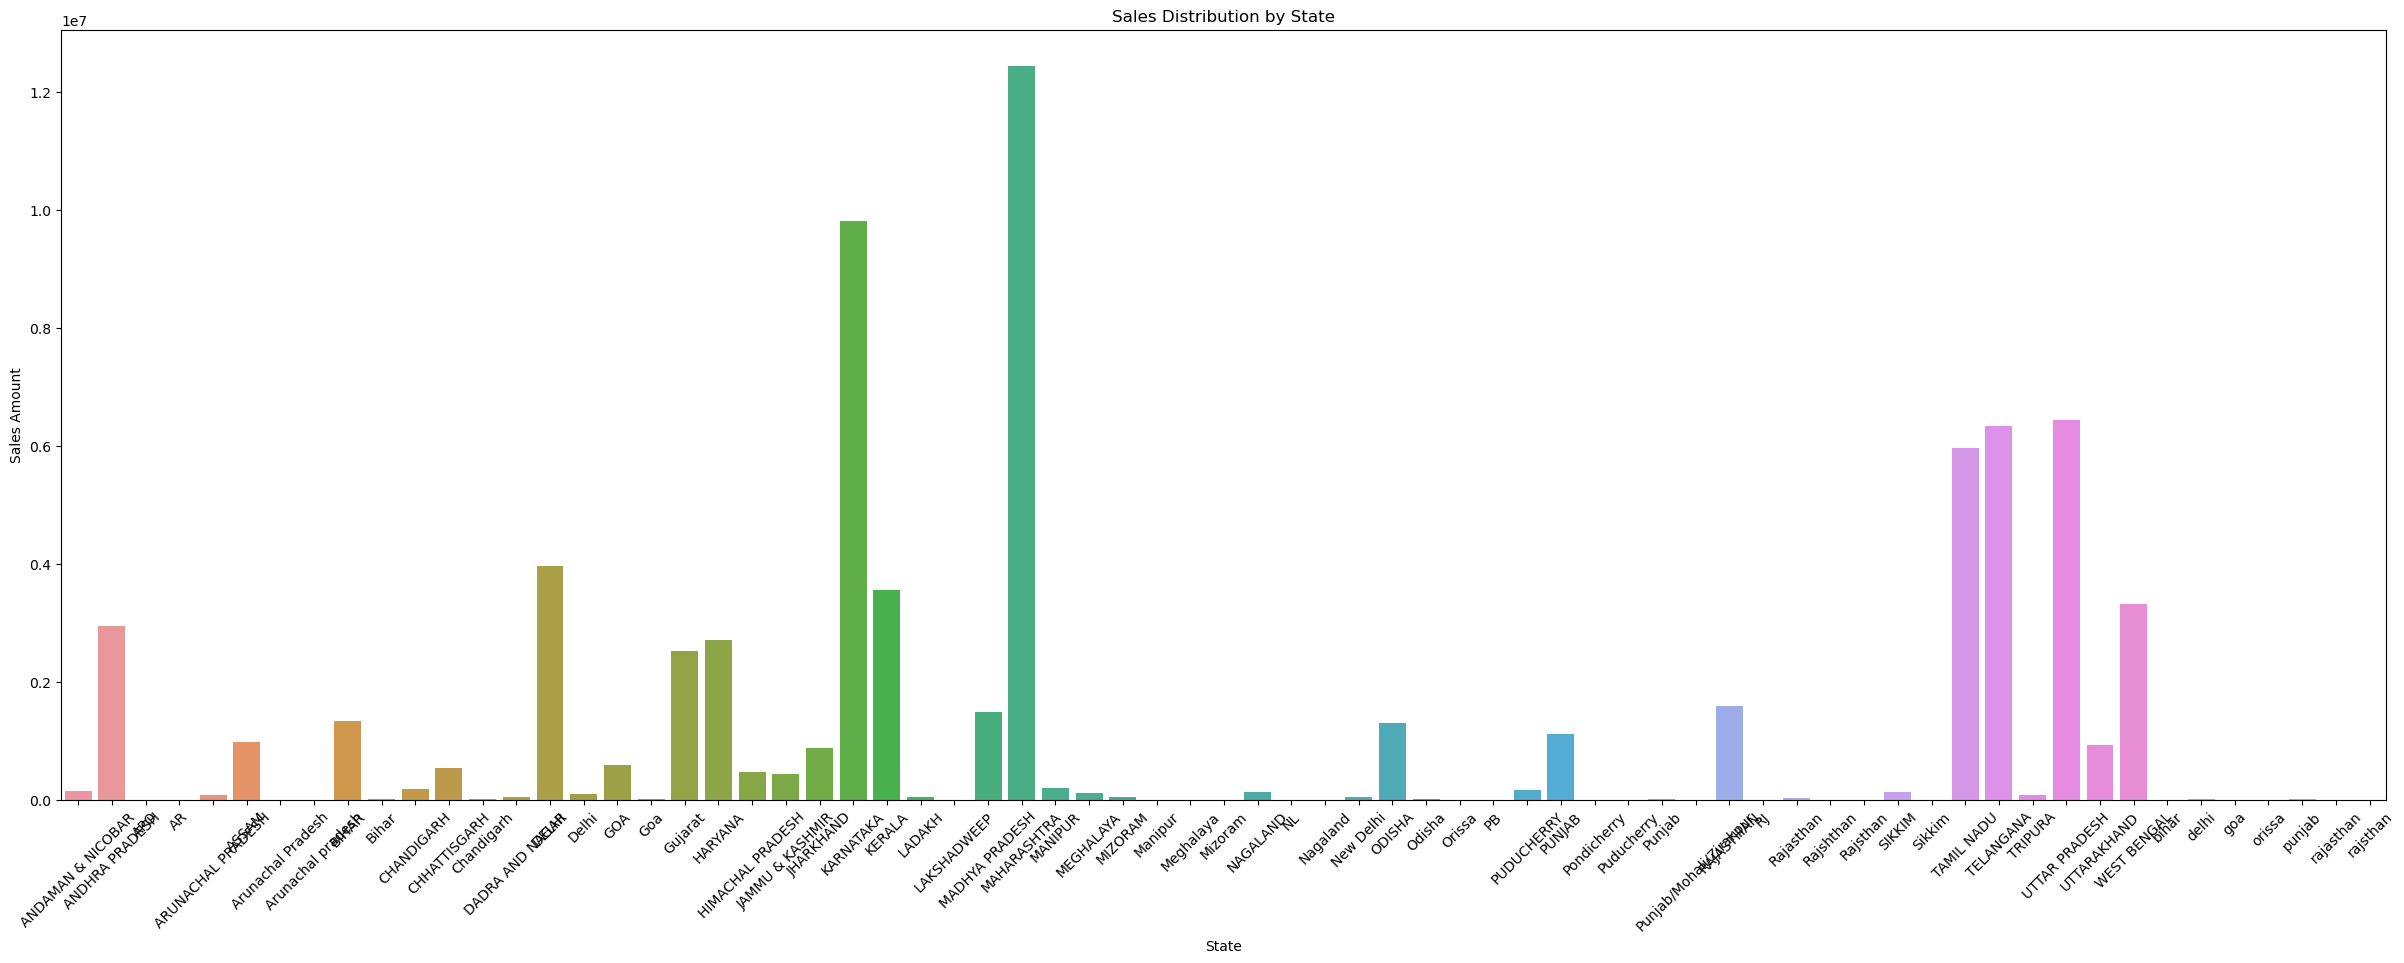

In [164]:
# Analyze sales by state
state_sales = df.groupby('ship-state')['Amount'].sum().reset_index()

# Plot sales distribution by state
plt.figure(figsize=(30, 10))
sns.barplot(data=state_sales, x='ship-state', y='Amount')
plt.title('Sales Distribution by State')
plt.ylabel('Sales Amount')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()
